# **DSCI 633 Foundations of Data Science**
*Rochester Institute of Technology*

*Fall 2023*


**Dataset:** [KDD Cup 1999 Data](https://kdd.ics.uci.edu/databases/kddcup99/task.html)

**About the data:** The dataset was part of the 1999 KDD Cup, arranged by ACM's SIGKDD and is the foremost annual competition in Data Mining and Knowledge Discovery, highlighting professionals' talents and innovations in the field.





## **Problem Statement:** *Address the class imbalance in the KDD99 dataset and develop a strong intrusion detection system to accuractely classify between anomalies and normal connections.*


### **Import libraries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import libraries.**

In [ ]:
from sklearn.datasets import fetch_kddcup99

In [ ]:
dataset = fetch_kddcup99()
dataset.data

array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       ...,
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object)

In [ ]:
X = dataset.data  # Features
y = dataset.target  # Target variable

### **Data Preprocessing.**

In [ ]:
dataset = pd.DataFrame(data = np.c_[X, y], columns = dataset.feature_names + ["target"])

In [ ]:
dataset = dataset.rename(columns= {"target": "attack_type"})

In [ ]:
dataset.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [ ]:
dataset["attack_type"].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: attack_type, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     494021 non-null  object
 1   protocol_type                494021 non-null  object
 2   service                      494021 non-null  object
 3   flag                         494021 non-null  object
 4   src_bytes                    494021 non-null  object
 5   dst_bytes                    494021 non-null  object
 6   land                         494021 non-null  object
 7   wrong_fragment               494021 non-null  object
 8   urgent                       494021 non-null  object
 9   hot                          494021 non-null  object
 10  num_failed_logins            494021 non-null  object
 11  logged_in                    494021 non-null  object
 12  num_compromised              494021 non-null  object
 13  root_shell    

In [ ]:
dataset.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Convert all the objective data into their respective data types.

In [ ]:
pd.set_option('display.max_columns', None)
dataset.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     494021 non-null  object
 1   protocol_type                494021 non-null  object
 2   service                      494021 non-null  object
 3   flag                         494021 non-null  object
 4   src_bytes                    494021 non-null  object
 5   dst_bytes                    494021 non-null  object
 6   land                         494021 non-null  object
 7   wrong_fragment               494021 non-null  object
 8   urgent                       494021 non-null  object
 9   hot                          494021 non-null  object
 10  num_failed_logins            494021 non-null  object
 11  logged_in                    494021 non-null  object
 12  num_compromised              494021 non-null  object
 13  root_shell    

In [ ]:
continuous_cols = ["duration", "src_bytes", "dst_bytes", "wrong_fragment", "urgent", "hot", "num_failed_logins", "num_compromised", "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
dataset[continuous_cols] = dataset[continuous_cols].apply(pd.to_numeric, errors='coerce')
len(continuous_cols)

32

In [ ]:
#decode string columns
columns_to_decode = ["protocol_type", "service", "flag", "attack_type"]

def decode_b_to_string(byte_str):
  return byte_str.decode('utf-8')

for i in columns_to_decode:
  dataset[i] = dataset[i].apply(decode_b_to_string)
  dataset[i] = dataset[i].astype('str')


In [ ]:
discrete_cols = ["src_bytes", "dst_bytes", "land", "logged_in", "root_shell", "su_attempted", "is_host_login", "is_guest_login"]
dataset[discrete_cols] = dataset[discrete_cols].apply(pd.to_numeric, errors='coerce')
len(discrete_cols)

8

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

### **Split the data.**

Here we will use the **training data** for training the model.

Use the **testing data** to test the model on completely unseen data.

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

y = y.str.rstrip('.')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

Perform class imbalance handling only on training data so as to keep the testing data untouched to reflect the real-world scenarios.

In [ ]:
X_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
133888,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
67704,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,220,10,1.0,1.0,0.0,0.0,0.05,0.06,0.0,255,10,0.04,0.07,0.00,0.0,1.0,1.0,0.0,0.0
391027,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,295,24,1.0,1.0,0.0,0.0,0.08,0.05,0.0,255,24,0.09,0.05,0.00,0.0,1.0,1.0,0.0,0.0
372089,0,tcp,http,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.00,0.00,0.0,8,8,1.00,0.00,0.12,0.0,0.0,0.0,1.0,1.0
460597,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,7,0.0,0.0,1.0,1.0,0.06,0.07,0.0,255,7,0.03,0.07,0.00,0.0,0.0,0.0,1.0,1.0


### **Exploratory Data Analysis and Visualisation.**


Perform EDA and visualisation only on the training data.

In [ ]:
X_train.nunique()

duration                       2117
protocol_type                     3
service                          65
flag                             11
src_bytes                      3065
dst_bytes                      9747
land                              2
wrong_fragment                    3
urgent                            4
hot                              22
num_failed_logins                 6
logged_in                         2
num_compromised                  20
root_shell                        2
su_attempted                      3
num_root                         18
num_file_creations               15
num_shells                        2
num_access_files                  6
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           484
srv_count                       455
serror_rate                      89
srv_serror_rate                  48
rerror_rate                      74
srv_rerror_rate             

In [ ]:
#remove num_outbound_cmds as it has only 1 unique value, hence no real use for it.

X_train.drop(['num_outbound_cmds', "is_host_login"], axis=1, inplace=True)
X_test.drop(['num_outbound_cmds', "is_host_login"], axis=1, inplace=True)

In [ ]:
X_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,395216.000000,3.952160e+05,3.952160e+05,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000,395216.000000
mean,47.440458,3.376421e+03,8.490896e+02,0.000053,0.006548,0.000018,0.034318,0.000170,0.148547,0.009494,0.000106,0.000035,0.010652,0.001070,0.000101,0.001045,0.001392,332.071386,292.618158,0.177122,0.177019,0.057312,0.057620,0.791121,0.021003,0.029011,232.466122,188.596540,0.753511,0.030853,0.601189,0.006671,0.177174,0.176839,0.058029,0.057290
std,698.194390,1.104474e+06,3.133821e+04,0.007289,0.135787,0.006161,0.779550,0.016758,0.355641,1.597168,0.010308,0.007793,1.786916,0.102158,0.010060,0.036846,0.037279,213.188312,246.373954,0.381076,0.381361,0.231392,0.231962,0.388493,0.082147,0.142360,64.753992,106.071653,0.410917,0.108955,0.481466,0.042165,0.380942,0.381258,0.230416,0.229915
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,45.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,510.000000,510.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,511.000000,511.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.153771e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,1.000000,2.000000,993.000000,28.000000,1.000000,8.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.corr()

<ipython-input-22-1d31ae5364df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.003810,0.003757,-0.000495,-0.003277,0.004293,0.015488,0.005392,-0.017360,0.056393,0.017546,0.054974,0.054745,0.075797,-0.000278,0.023674,0.026160,-0.105304,-0.080339,-0.031576,-0.031531,0.008355,0.008451,0.021251,0.054802,-0.012102,0.010648,-0.117510,-0.118599,0.407797,0.042669,-0.006620,-0.030513,-0.030690,0.003436,0.007126
src_bytes,0.003810,1.000000,-0.000006,-0.000022,-0.000141,-0.000006,0.004464,-0.000028,0.001382,0.000118,-0.000024,-0.000010,-0.000011,0.000010,0.000004,-0.000058,-0.000086,-0.003180,-0.002608,0.001876,0.001380,0.000719,0.001588,-0.002271,0.007033,-0.000028,-0.001437,-0.003419,-0.002384,0.000654,-0.000907,0.001108,-0.000646,0.001386,-0.000367,0.001567
dst_bytes,0.003757,-0.000006,1.000000,-0.000198,-0.001307,0.019201,0.004627,0.060224,0.050837,0.027225,0.040476,0.095869,0.023660,0.005244,-0.000020,0.008777,0.001370,-0.041567,-0.031427,-0.012249,-0.012285,-0.006426,-0.006046,0.014524,-0.006587,0.008975,-0.050560,-0.005055,0.007724,-0.005477,-0.021139,0.009210,-0.012311,-0.012292,-0.004874,-0.005582
land,-0.000495,-0.000022,-0.000198,1.000000,-0.000352,-0.000021,-0.000321,-0.000074,-0.003045,-0.000043,-0.000075,-0.000033,-0.000043,-0.000076,-0.000073,-0.000207,-0.000272,-0.011192,-0.008604,0.015131,0.015731,-0.000800,-0.001811,0.002436,0.002700,0.039966,-0.025843,-0.012653,0.002067,-0.000280,0.004070,0.092616,0.013713,0.008910,-0.001640,-0.001816
wrong_fragment,-0.003277,-0.000141,-0.001307,-0.000352,1.000000,-0.000139,-0.002123,-0.000488,-0.020143,-0.000287,-0.000497,-0.000219,-0.000287,-0.000505,-0.000485,-0.001368,-0.001800,-0.062510,-0.048288,-0.013867,-0.022385,-0.011642,-0.011979,0.017357,-0.007149,0.000476,-0.006230,-0.059318,-0.055191,0.074302,-0.031847,0.013963,-0.019231,-0.022368,0.029960,-0.012017
urgent,0.004293,-0.000006,0.019201,-0.000021,-0.000139,1.000000,0.000400,0.147022,0.006883,0.017984,0.039814,-0.000013,0.011935,0.016051,-0.000029,0.022212,-0.000107,-0.004465,-0.003403,-0.001336,-0.001335,-0.000712,-0.000714,0.001546,-0.000735,-0.000586,-0.007981,-0.005073,-0.003663,0.011814,-0.002234,-0.000455,-0.001337,-0.001334,-0.000724,-0.000716
hot,0.015488,0.004464,0.004627,-0.000321,-0.002123,0.000400,1.000000,0.008658,0.104895,0.008357,0.022532,-0.000200,0.001271,0.027594,0.004397,0.002275,0.839263,-0.068214,-0.051969,-0.020270,-0.020225,-0.008326,-0.005856,0.022663,-0.002327,0.002206,-0.025599,-0.038737,-0.029090,0.001040,-0.052817,-0.004138,-0.019462,-0.020194,-0.006428,-0.007697
num_failed_logins,0.005392,-0.000028,0.060224,-0.000074,-0.000488,0.147022,0.008658,1.000000,-0.001254,0.009015,0.043838,0.116209,0.004249,0.002850,-0.000102,0.003811,-0.000378,-0.015689,-0.011959,-0.003117,-0.003904,0.024900,0.024826,0.004662,0.004766,-0.002062,-0.025738,-0.016028,0.000105,0.001390,-0.009653,0.018703,-0.001863,-0.002451,0.024634,0.023216
logged_in,-0.017360,0.001382,0.050837,-0.003045,-0.020143,0.006883,0.104895,-0.001254,1.000000,0.014231,0.024682,0.010883,0.014272,0.025083,0.024087,0.067900,0.089375,-0.634910,-0.478136,-0.192185,-0.191563,-0.099304,-0.094495,0.220264,-0.073315,0.331688,-0.621313,0.119678,0.161521,-0.061758,-0.461445,0.140327,-0.191480,-0.192207,-0.091061,-0.088151
num_compromised,0.056393,0.000118,0.027225,-0.000043,-0.000287,0.017984,0.008357,0.009015,0.014231,1.000000,0.243837,0.675326,0.991978,0.012080,0.005924,0.376469,-0.000222,-0.009200,-0.007006,-0.002747,-0.002742,-0.001119,-0.000474,0.003184,-0.001410,0.000942,-0.00

<ipython-input-23-12559c7cc3ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(), annot=True, cmap='inferno')


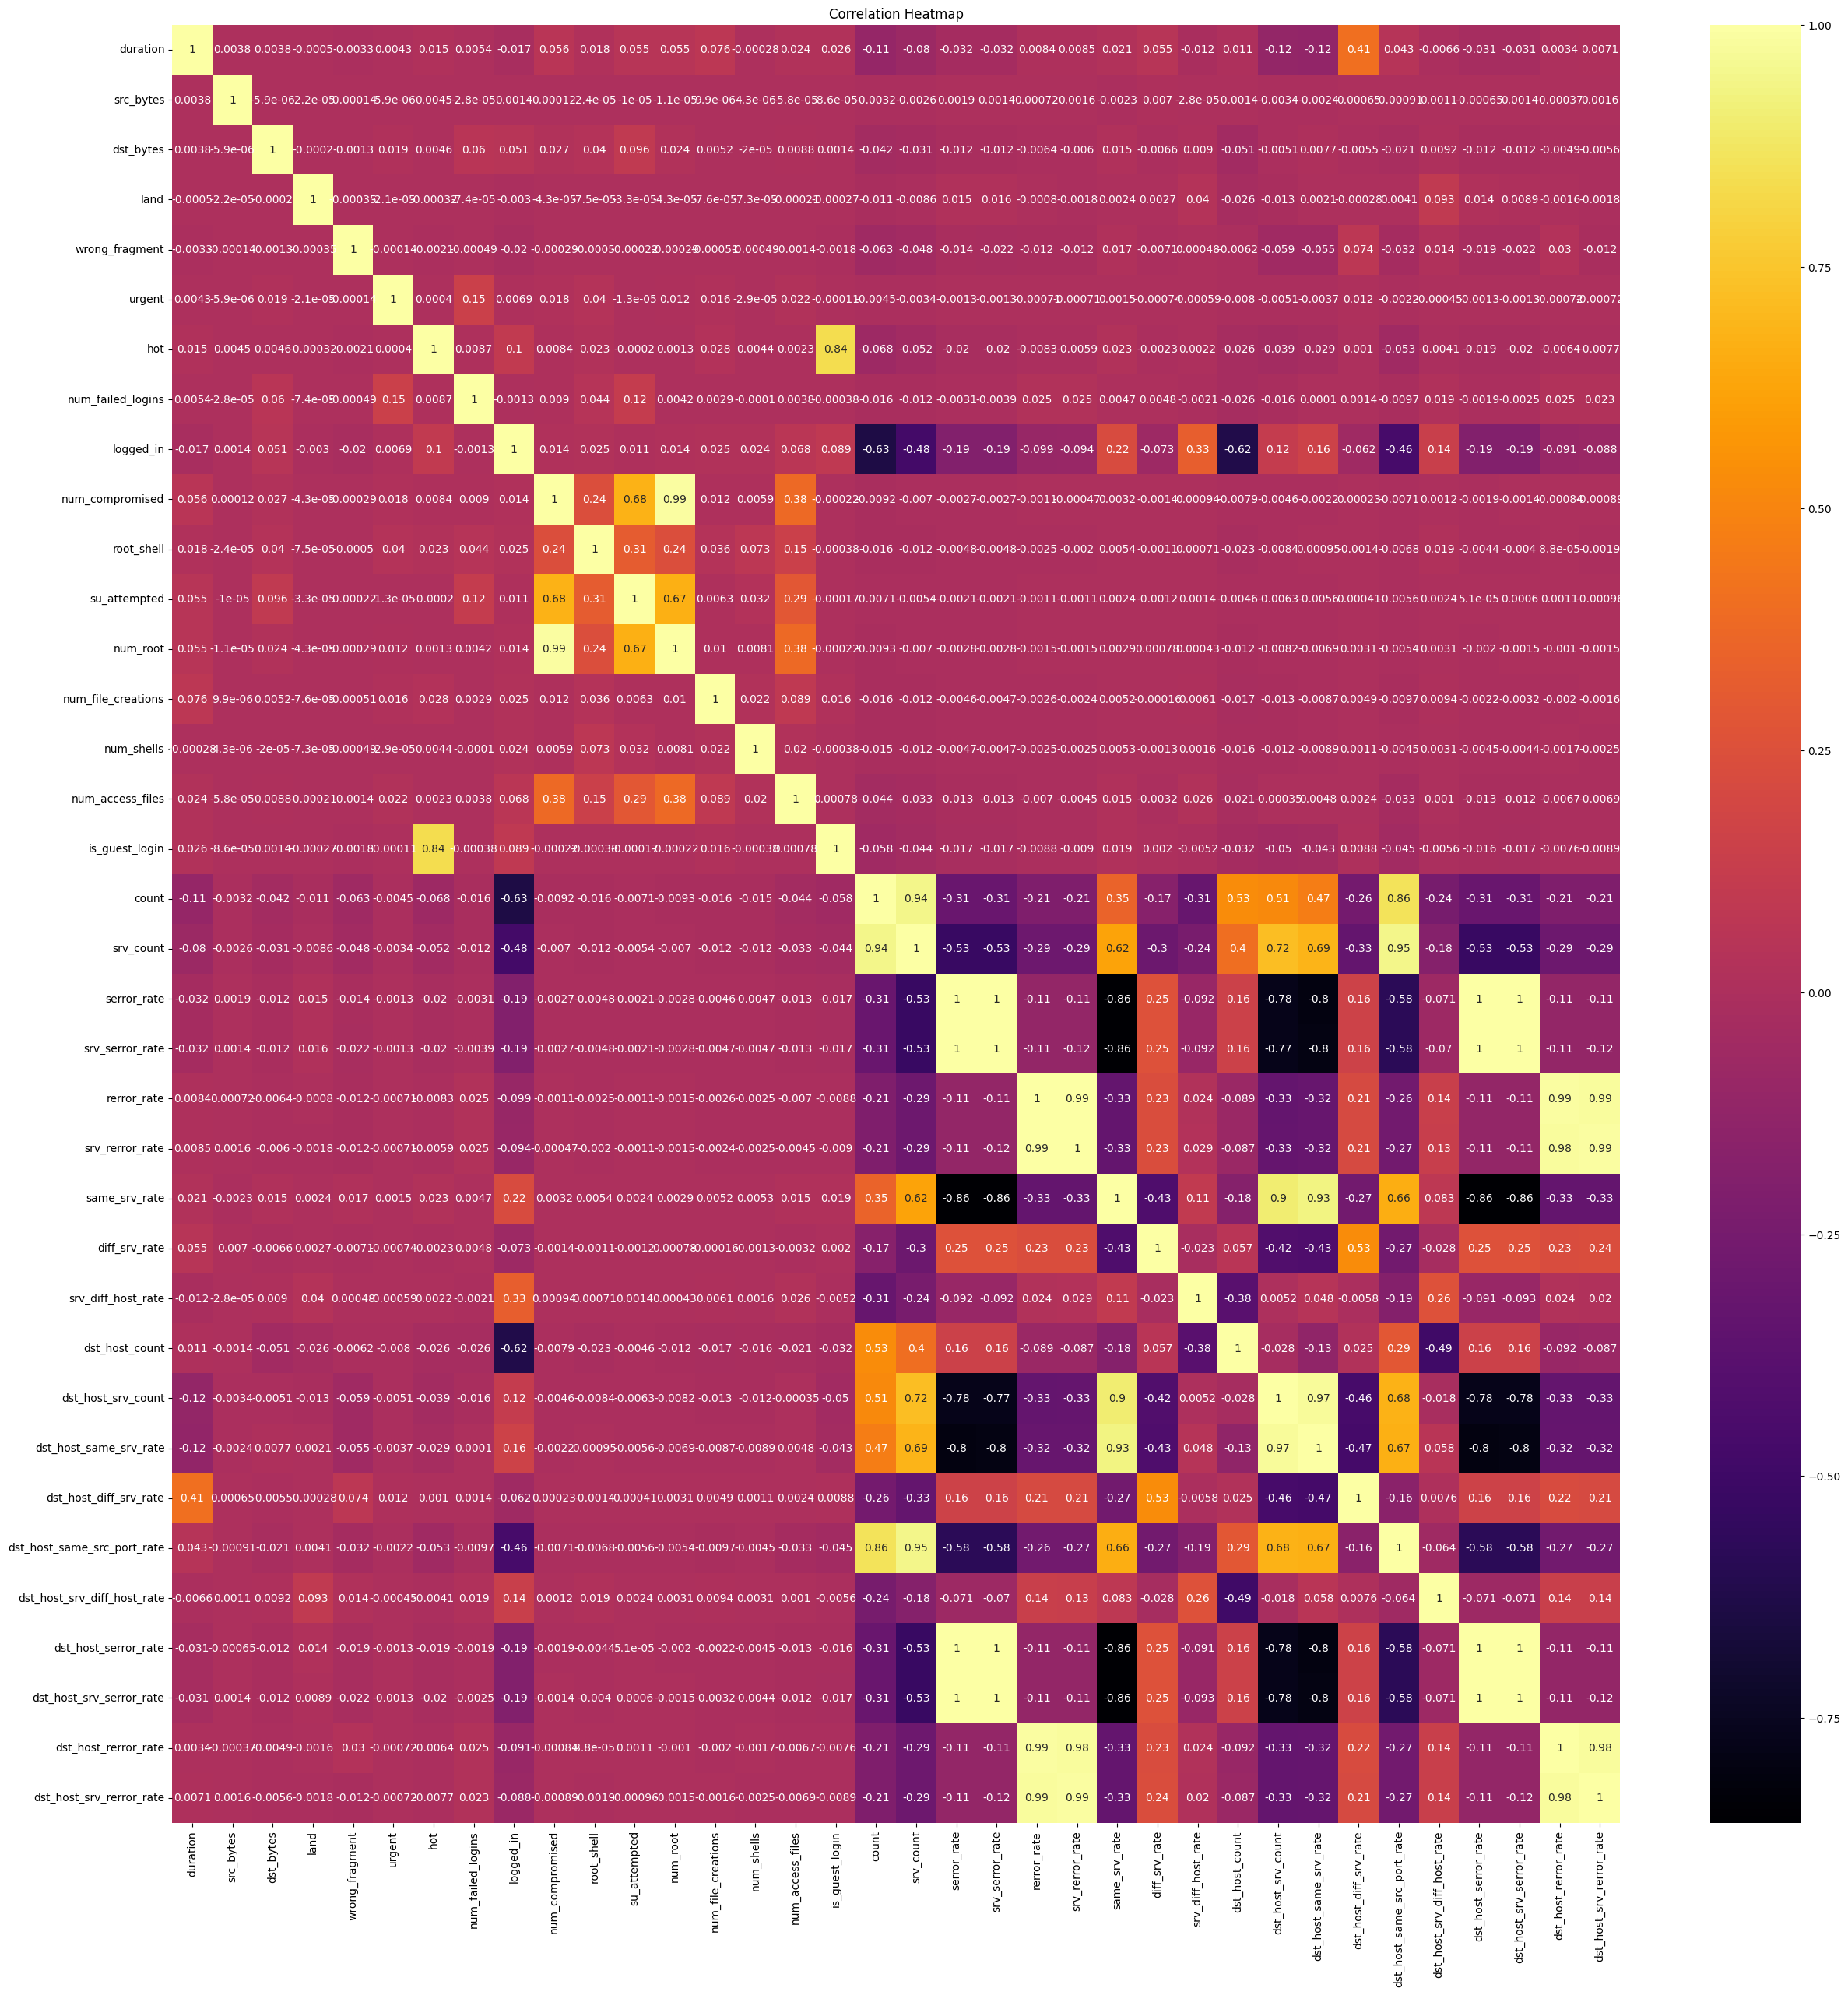

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(), annot=True, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()

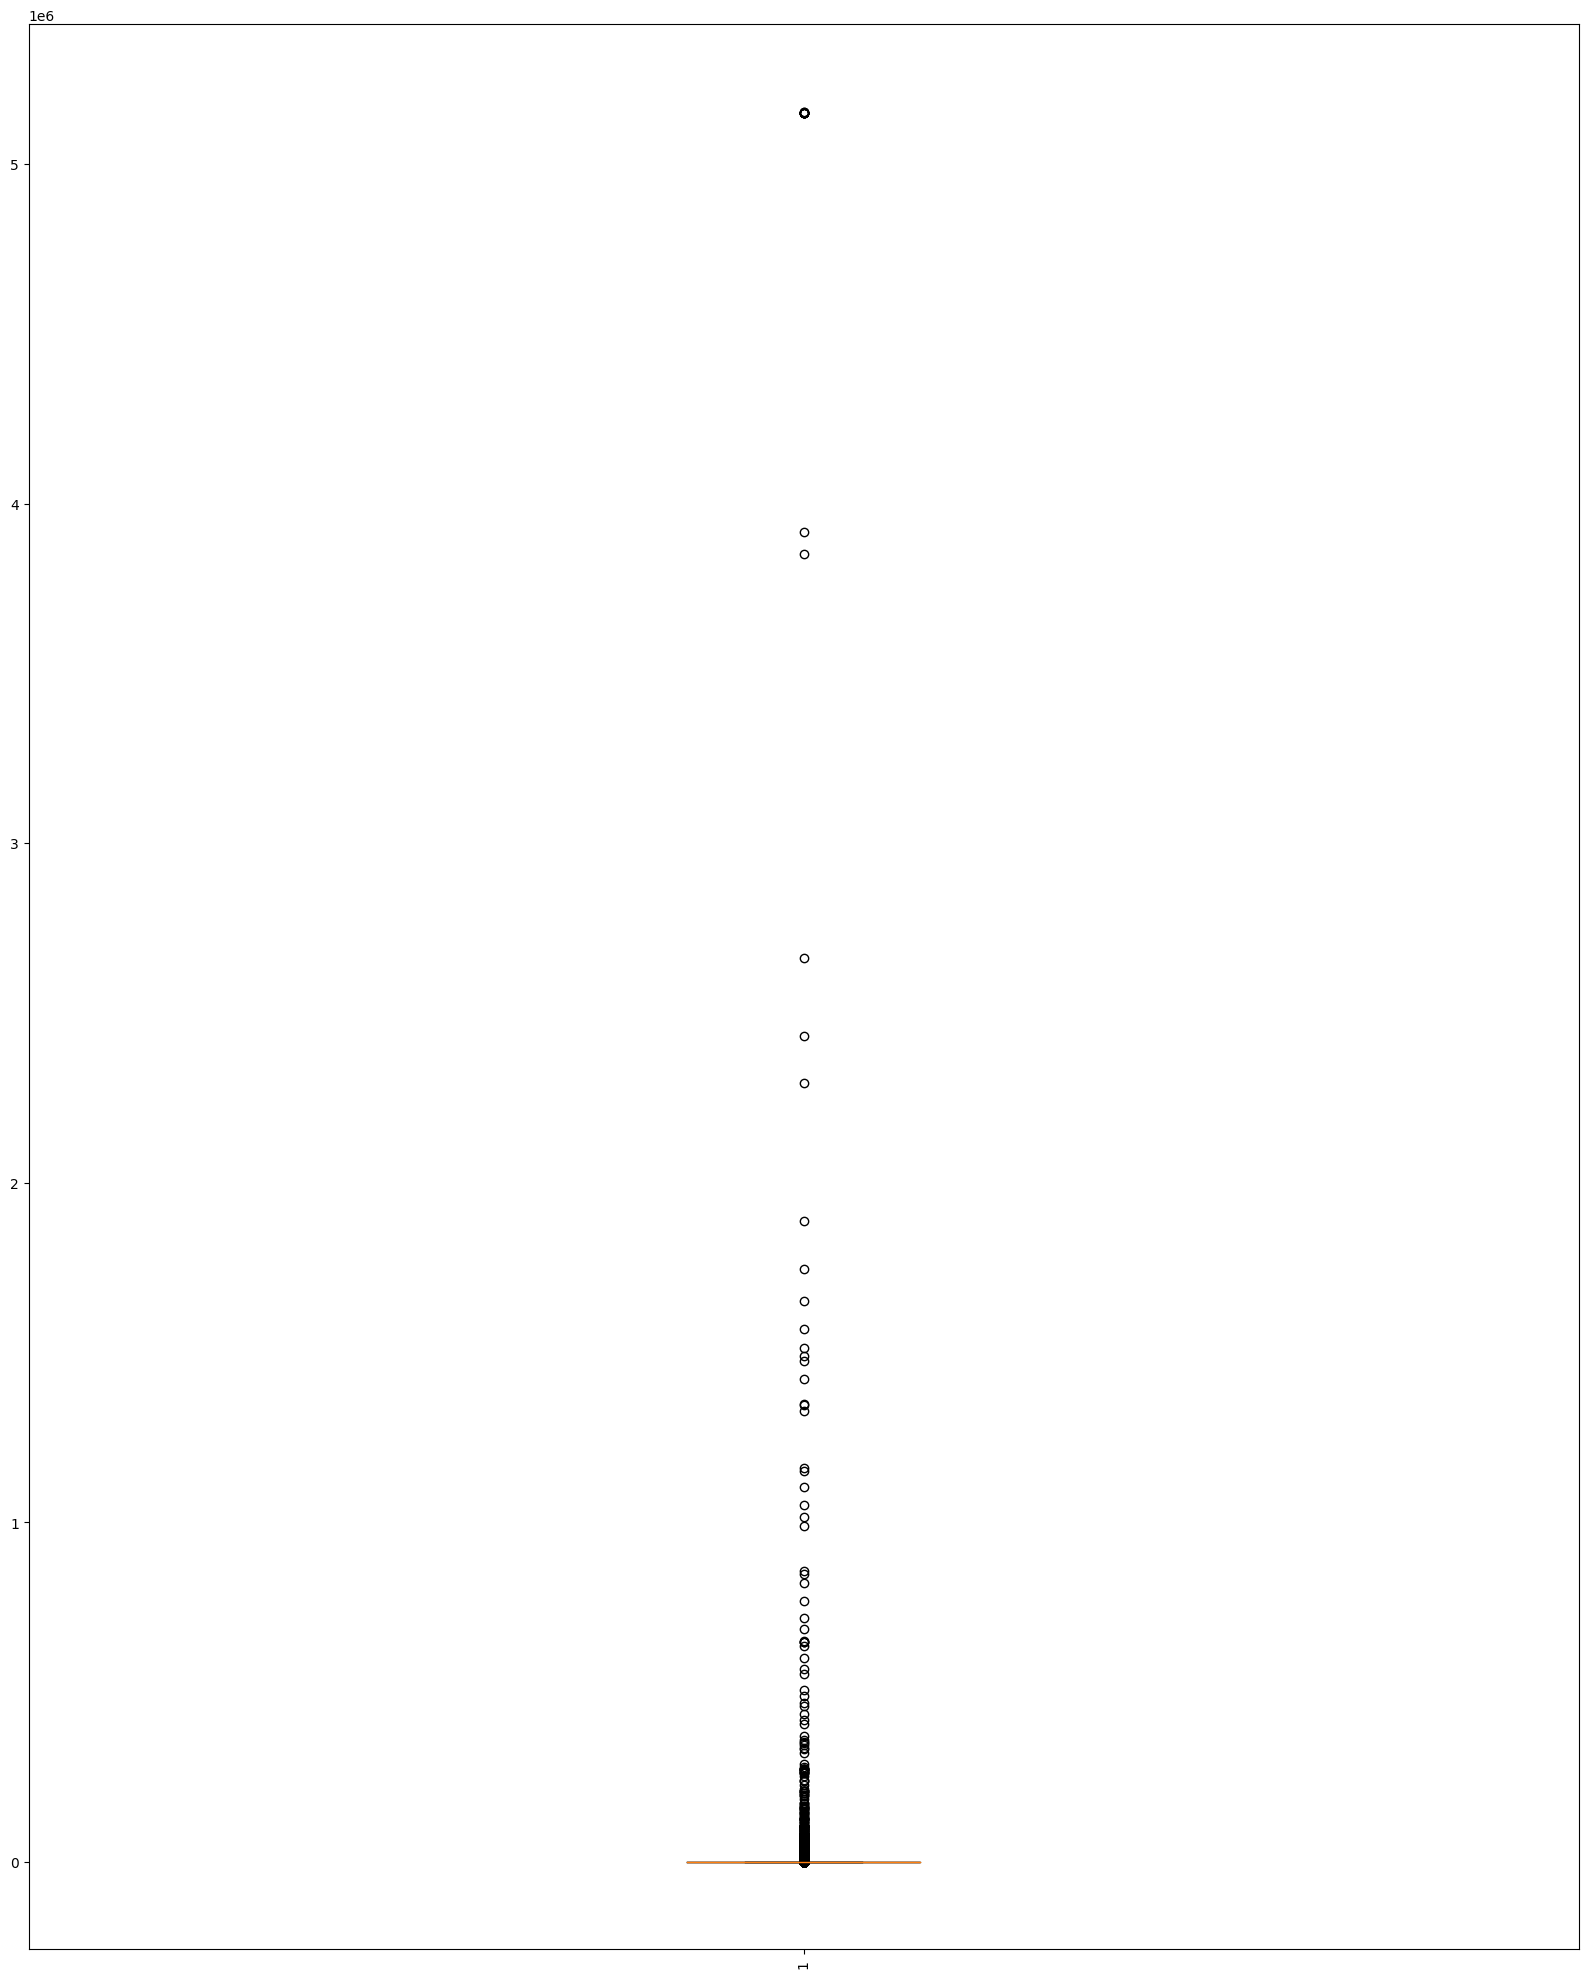

In [ ]:
plt.figure(figsize= (20, 25))
plt.boxplot(X_train["dst_bytes"])
plt.xticks(rotation=90)  # Rotates x-axis labels for better visibility if needed
plt.show()

In [ ]:
sns.scatterplot(data= X_train, x= "dst_bytes", y="num_file_creations", hue= "logged_in")

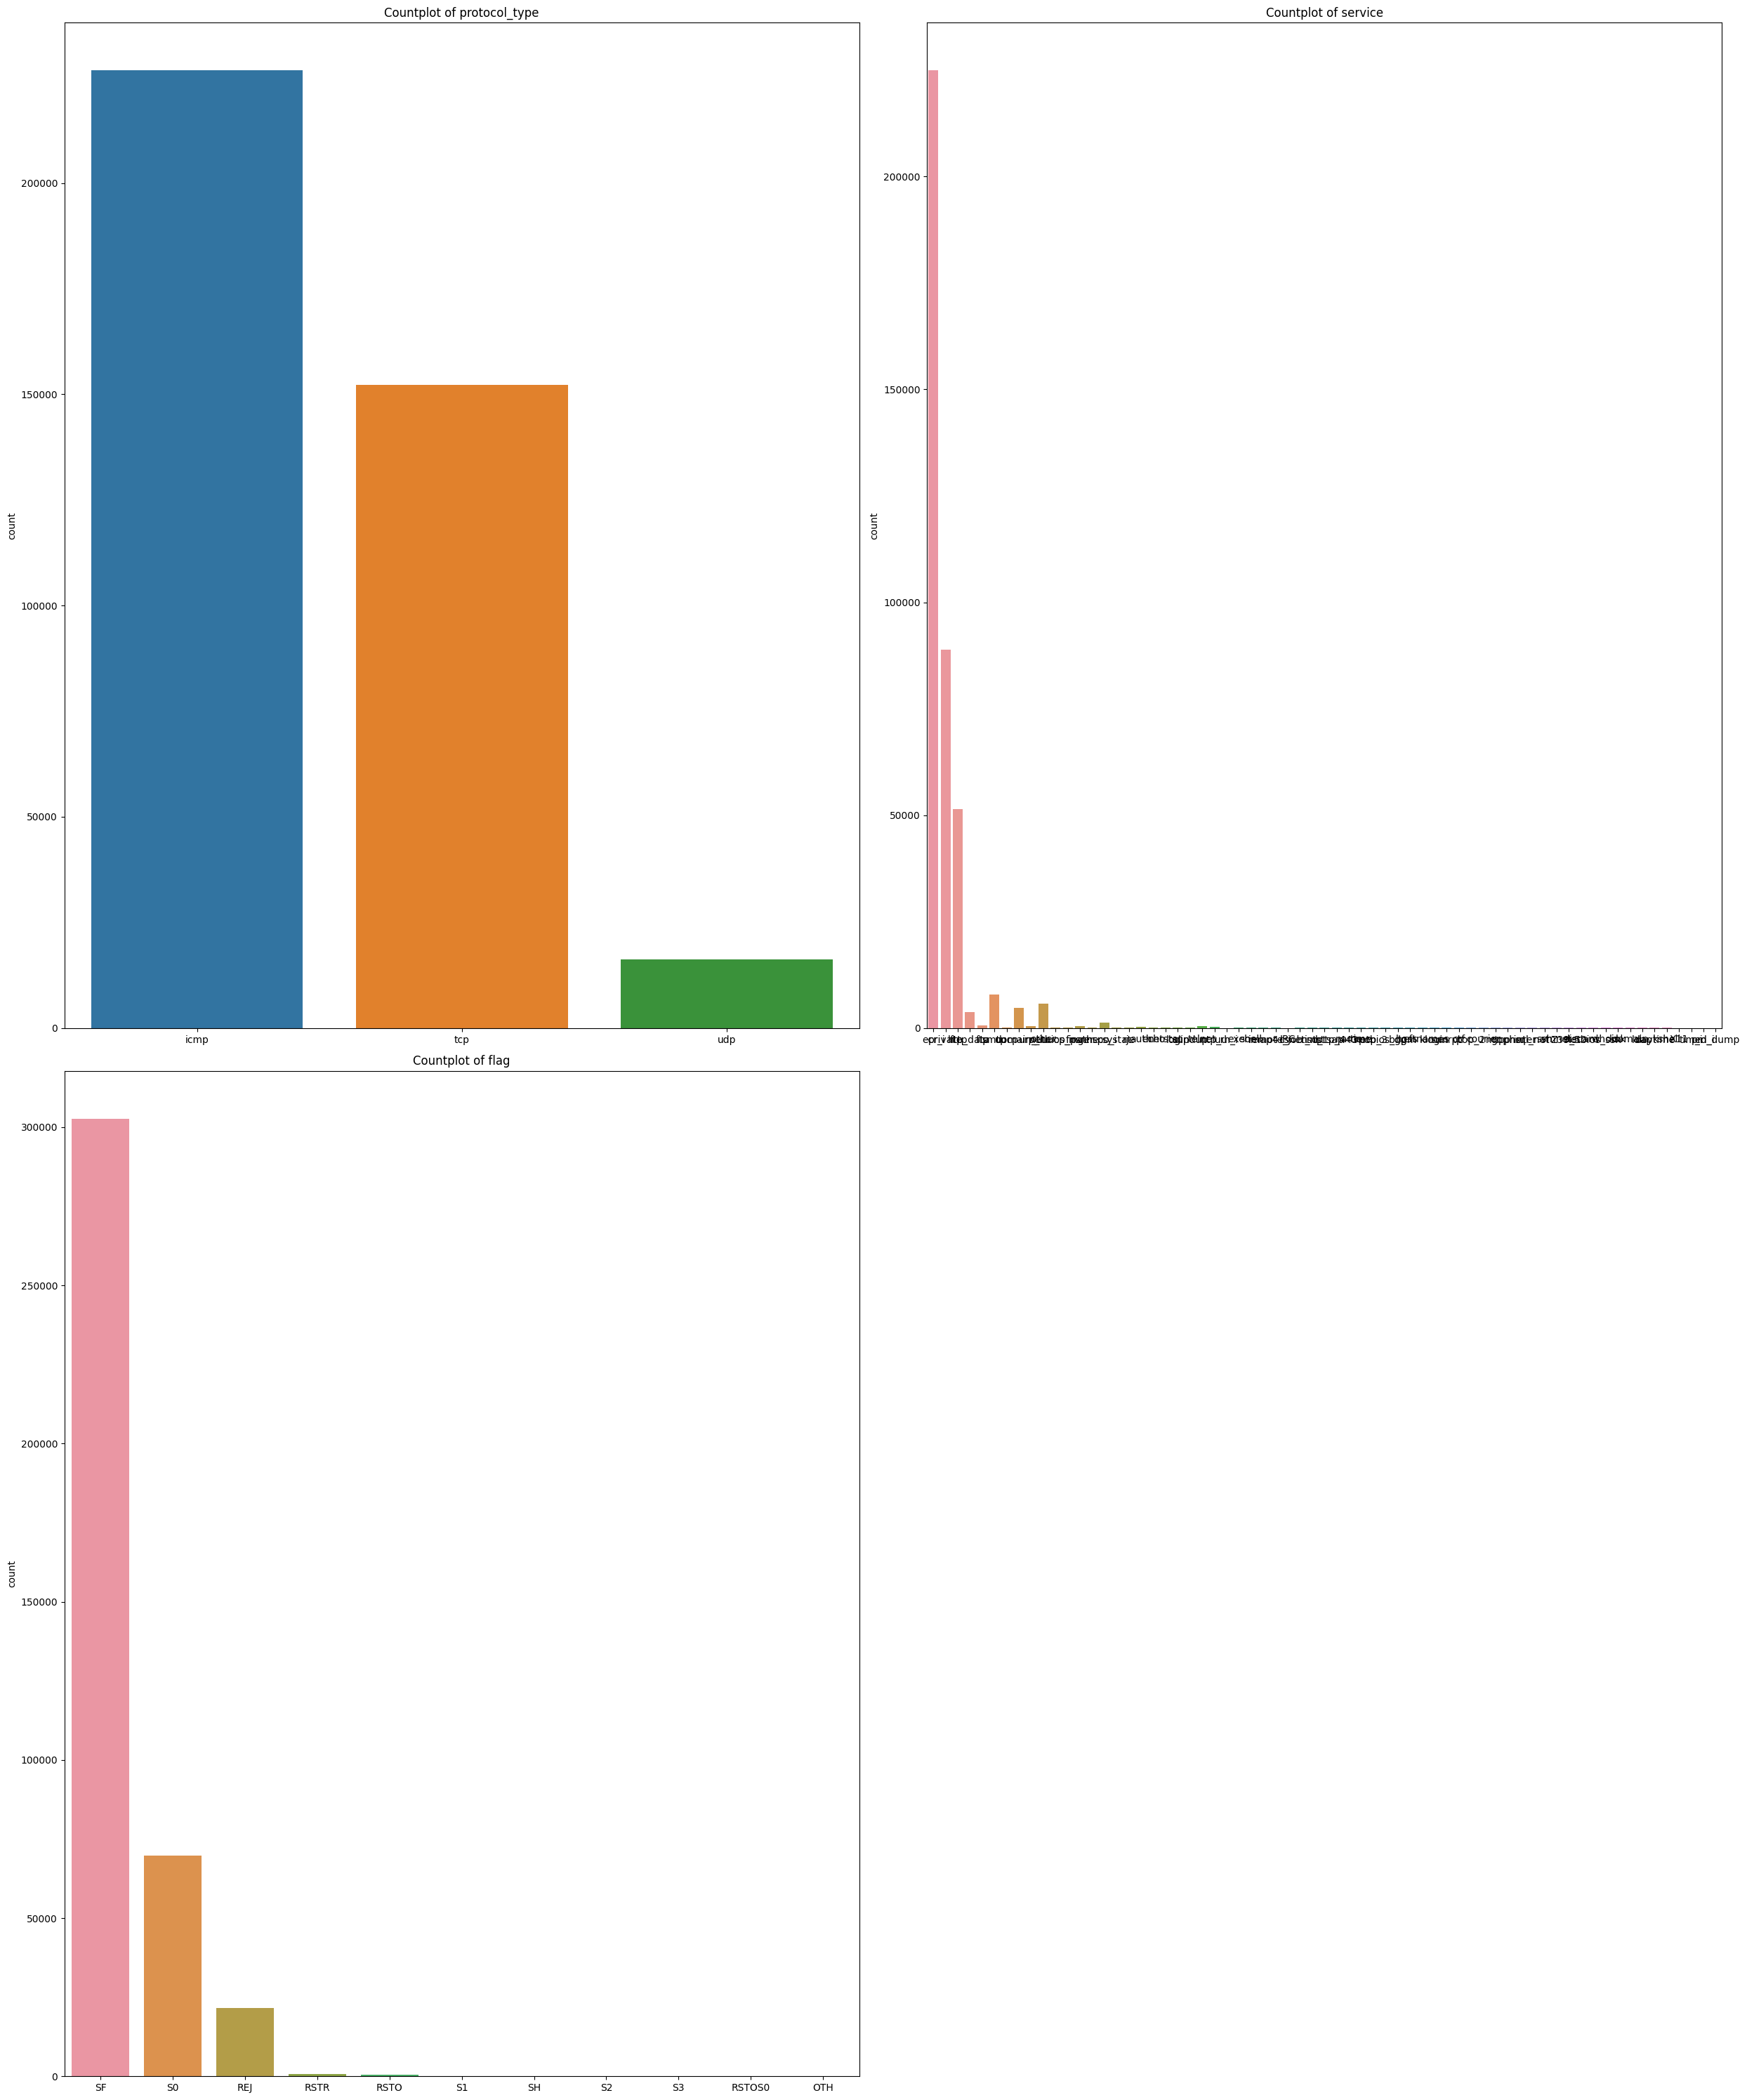

In [ ]:
columns_to_visualize = ["protocol_type", "service", "flag"]

# Set up the plot grid
num_plots = len(columns_to_visualize)
num_cols = 2  # Number of columns in the plot grid
num_rows = (num_plots + 1) // num_cols

plt.figure(figsize=(25, 30))

# Create countplots for each specified column
for i, column in enumerate(columns_to_visualize, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=X_train, x=column)
    plt.title(f'Countplot of {column}')
    plt.xlabel('')  # Optionally remove x-axis label for better visualization

plt.tight_layout()
plt.show()

<Axes: xlabel='duration', ylabel='Count'>

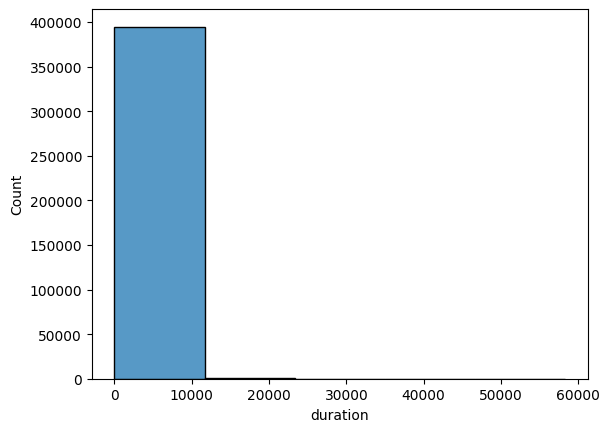

In [ ]:
sns.histplot(X_train, x= "duration", bins= 5)

### **Addressing the class imbalance.**

Now the biggest drawback of this version of the data set is the class imbalance in the "attack_type" class.

In the orignal dataset, there were a total of 5 million records and the training data and testing data had different probablitiy distributions too. Some of the attack types were not present in the training data so as to maintain the realisticness of the task.

In my case, I fetched the default data from scikit-learn which has an abnormally low number of certain attack types.


*Here's the distribution in the training and validation data:*

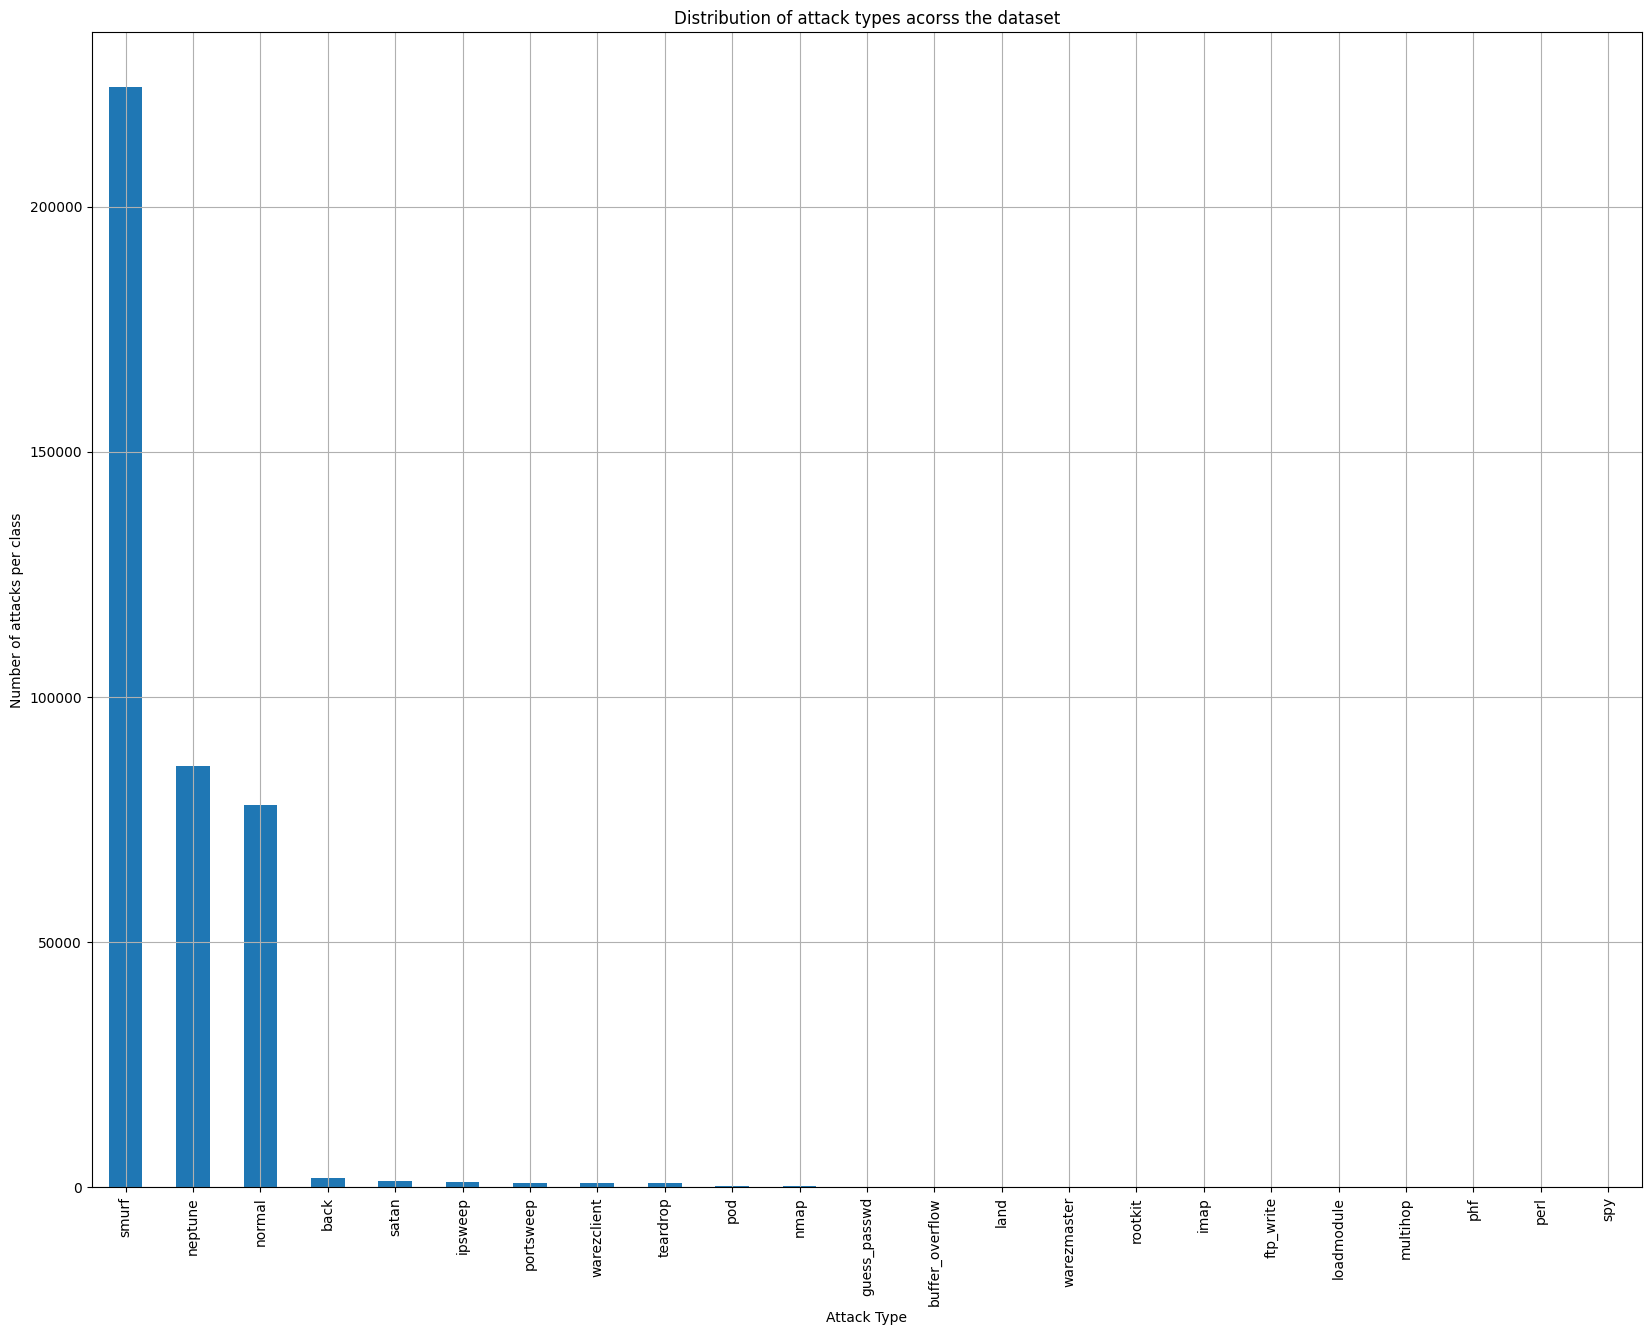

In [ ]:
plt.figure(figsize=(20,15))
class_distribution = y_train.value_counts()
class_distribution.plot(kind= "bar")
plt.xlabel('Attack Type')
plt.ylabel('Number of attacks per class')
plt.title('Distribution of attack types acorss the dataset')
plt.grid()
plt.show()

In [ ]:
attackTypesCount = y_train.value_counts()
attackTypesCount.sum()

395216

In [ ]:
attackTypesCount.index

Index(['smurf', 'neptune', 'normal', 'back', 'satan', 'ipsweep', 'portsweep',
       'warezclient', 'teardrop', 'pod', 'nmap', 'guess_passwd',
       'buffer_overflow', 'land', 'warezmaster', 'rootkit', 'imap',
       'ftp_write', 'loadmodule', 'multihop', 'phf', 'perl', 'spy'],
      dtype='object')

In [ ]:
for i in range(len(attackTypesCount)):
  print(f"The class {attackTypesCount.index[i].capitalize()} has {attackTypesCount[i]} data points ({np.round((attackTypesCount[i]/attackTypesCount.sum()*100), 3)}%)")

The class Smurf has 224388 data points (56.776%)
The class Neptune has 85907 data points (21.737%)
The class Normal has 77925 data points (19.717%)
The class Back has 1768 data points (0.447%)
The class Satan has 1285 data points (0.325%)
The class Ipsweep has 982 data points (0.248%)
The class Portsweep has 804 data points (0.203%)
The class Warezclient has 802 data points (0.203%)
The class Teardrop has 794 data points (0.201%)
The class Pod has 226 data points (0.057%)
The class Nmap has 186 data points (0.047%)
The class Guess_passwd has 45 data points (0.011%)
The class Buffer_overflow has 21 data points (0.005%)
The class Land has 20 data points (0.005%)
The class Warezmaster has 16 data points (0.004%)
The class Rootkit has 10 data points (0.003%)
The class Imap has 9 data points (0.002%)
The class Ftp_write has 7 data points (0.002%)
The class Loadmodule has 7 data points (0.002%)
The class Multihop has 6 data points (0.002%)
The class Phf has 4 data points (0.001%)
The class P

### **Feature Engineering.**

Before that, let's scale the numerical variables and apply encoding on Object datatypes.


In [ ]:
numericDataX_train = X_train.select_dtypes(include=["int64", "float64"])
numericDataX_test = X_test.select_dtypes(include=["int64", "float64"])

numericCols = X_train.select_dtypes(include=["int64", "float64"]).columns
numericCols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(numericDataX_train)
X_testScaled = scaler.fit_transform(numericDataX_test)

In [ ]:
X_trainScaled

array([[-6.79474349e-02, -2.12266082e-03, -2.70944236e-02, ...,
        -4.63830966e-01, -2.51844916e-01, -2.49177664e-01],
       [-6.79474349e-02, -3.05704317e-03, -2.70944236e-02, ...,
         2.15907035e+00, -2.51844916e-01, -2.49177664e-01],
       [-6.79474349e-02, -3.05704317e-03, -2.70944236e-02, ...,
         2.15907035e+00, -2.51844916e-01, -2.49177664e-01],
       ...,
       [-6.79474349e-02, -2.12266082e-03, -2.70944236e-02, ...,
        -4.63830966e-01, -2.51844916e-01, -2.49177664e-01],
       [ 1.30244115e+01, -2.92394801e-03, -2.37438768e-02, ...,
        -4.63830966e-01, -2.51844916e-01, -2.49177664e-01],
       [-6.79474349e-02, -3.05704317e-03, -2.70944236e-02, ...,
         2.15907035e+00, -2.51844916e-01, -2.49177664e-01]])

Data is not pandas dataframe, so convert it.

In [ ]:
X_trainScaled = pd.DataFrame(data= X_trainScaled, columns= numericCols)
X_testScaled = pd.DataFrame(data= X_testScaled, columns= numericCols)

In [ ]:
X_trainScaled.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05,3.952160e+05
mean,-3.901355e-18,7.461116e-19,-1.510202e-18,-2.022592e-18,7.398191e-18,-1.114673e-18,-1.119167e-17,1.707966e-19,1.778083e-17,2.251819e-18,-6.544208e-18,-3.564256e-18,-1.905731e-18,2.494530e-18,4.485659e-18,6.652079e-18,1.636052e-17,7.497073e-18,1.176519e-16,-8.680064e-17,-1.797859e-19,-6.364422e-18,1.233601e-16,1.025499e-16,-6.481283e-18,2.540375e-17,4.917145e-17,1.350552e-16,1.120642e-15,-3.568751e-17,2.673776e-16,9.852269e-18,2.905341e-17,-2.588198e-16,-8.714224e-17,-9.528654e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.794743e-02,-3.057043e-03,-2.709442e-02,-7.289604e-03,-4.822487e-02,-2.874994e-03,-4.402281e-02,-1.011622e-02,-4.176870e-01,-5.943991e-03,-1.030933e-02,-4.545793e-03,-5.961340e-03,-1.047695e-02,-1.006085e-02,-2.836092e-02,-3.733073e-02,-1.557645e+00,-1.187701e+00,-4.647938e-01,-4.641776e-01,-2.476830e-01,-2.484045e-01,-2.036384e+00,-2.556747e-01,-2.037867e-01,-3.589994e+00,-1.778013e+00,-1.833732e+00,-2.831680e-01,-1.248665e+00,-1.582201e-01,-4.650939e-01,-4.638310e-01,-2.518449e-01,-2.491777e-01
25%,-6.794743e-02,-3.017205e-03,-2.709442e-02,-7.289604e-03,-4.822487e-02,-2.874994e-03,-4.402281e-02,-1.011622e-02,-4.176870e-01,-5.943991e-03,-1.030933e-02,-4.545793e-03,-5.961340e-03,-1.047695e-02,-1.006085e-02,-2.836092e-02,-3.733073e-02,-1.008834e+00,-1.147112e+00,-4.647938e-01,-4.641776e-01,-2.476830e-01,-2.484045e-01,5.376662e-01,-2.556747e-01,-2.037867e-01,3.479925e-01,-1.353771e+00,-8.602986e-01,-2.831680e-01,-1.248665e+00,-1.582201e-01,-4.650939e-01,-4.638310e-01,-2.518449e-01,-2.491777e-01
50%,-6.794743e-02,-2.586230e-03,-2.709442e-02,-7.289604e-03,-4.822487e-02,-2.874994e-03,-4.402281e-02,-1.011622e-02,-4.176870e-01,-5.943991e-03,-1.030933e-02,-4.545793e-03,-5.961340e-03,-1.047695e-02,-1.006085e-02,-2.836092e-02,-3.733073e-02,8.346088e-01,8.823259e-01,-4.647938e-01,-4.641776e-01,-2.476830e-01,-2.484045e-01,5.376662e-01,-2.556747e-01,-2.037867e-01,3.479925e-01,6.260254e-01,5.998519e-01,-2.831680e-01,8.283260e-01,-1.582201e-01,-4.650939e-01,-4.638310e-01,-2.518449e-01,-2.491777e-01
75%,-6.794743e-02,-2.122661e-03,-2.709442e-02,-7.289604e-03,-4.822487e-02,-2.874994e-03,-4.402281e-02,-1.011622e-02,-4.176870e-01,-5.943991e-03,-1.030933e-02,-4.545793e-03,-5.961340e-03,-1.047695e-02,-1.006085e-02,-2.836092e-02,-3.733073e-02,8.392995e-01,8.863848e-01,-4.647938e-01,-4.641776e-01,-2.476830e-01,-2.484045e-01,5.376662e-01,-2.556747e-01,-2.037867e-01,3.479925e-01,6.260254e-01,5.998519e-01,8.395572e-02,8.283260e-01,-1.582201e-01,-4.650939e-01,-4.638310e-01,-2.518449e-01,-2.491777e-01
max

Coming back to class imbalance: We can clearly see from the graph that there is a high imbalance in the attack_type taget variable.

There are three main approaches to handle the class imbalance:

1. Convert the attack type into a binary class of ***'NORMAL'*** & ***'ANOMALY'***.

*   This method is actually the best approach as it gives the model a more comprehensive target to predict. Moreover, in real world scenarios, apart from developers and white-hat hackers, nobody actually cares what kind of attack is hacking their system. They only care whether it's actually a normal connection or an anomaly.

2. Convert the attack types into sub classes depicting all different kinds of attacks and 1 normal class.: ***NORMAL, DOS, PROBE, R2L, U2R***.

3. Perform oversampling directly using a combination of ***SMOTE*** and ***Random Oversampling.***


We will try to go on with the 2nd method in this situation i.e. ***converting the target variable into a 5 class classification***.

Here we are going to try to break the target variables into smaller groups to avoid misclassification.

back dos

buffer_overflow u2r

ftp_write r2l

guess_passwd r2l

imap r2l

ipsweep probe

land dos

loadmodule u2r

multihop r2l

neptune dos

nmap probe

perl u2r

phf r2l

pod dos

portsweep probe

rootkit u2r

satan probe

smurf dos

spy r2l

teardrop dos

warezclient r2l

warezmaster r2l

normal normal

In [ ]:
y_train.value_counts()

smurf              224388
neptune             85907
normal              77925
back                 1768
satan                1285
ipsweep               982
portsweep             804
warezclient           802
teardrop              794
pod                   226
nmap                  186
guess_passwd           45
buffer_overflow        21
land                   20
warezmaster            16
rootkit                10
imap                    9
ftp_write               7
loadmodule              7
multihop                6
phf                     4
perl                    2
spy                     2
Name: attack_type, dtype: int64

In [ ]:
class_mapping = {
    'back': 'DOS', 'buffer_overflow': 'U2R', 'ftp_write': 'R2L', 'guess_passwd': 'R2L',
    'imap': 'R2L', 'ipsweep': 'PROBE', 'land': 'DOS', 'loadmodule': 'U2R', 'multihop': 'R2L',
    'neptune': 'DOS', 'nmap': 'PROBE', 'perl': 'U2R', 'phf': 'R2L', 'pod': 'DOS',
    'portsweep': 'PROBE', 'rootkit': 'U2R', 'satan': 'PROBE', 'smurf': 'DOS',
    'spy': 'R2L', 'teardrop': 'DOS', 'warezclient': 'R2L', 'warezmaster': 'R2L',
    'normal': 'NORMAL'
}

# Map the original classes to the smaller classes using the mapping dictionary
y_train = y_train.map(class_mapping)

y_train.value_counts()

DOS       313103
NORMAL     77925
PROBE       3257
R2L          891
U2R           40
Name: attack_type, dtype: int64

In [ ]:
y_test = y_test.map(class_mapping)

y_test.value_counts()

DOS       78355
NORMAL    19353
PROBE       850
R2L         235
U2R          12
Name: attack_type, dtype: int64

Now comes encoding...

Two ways possible here,

1. Classify into smaller groups and then encode
2. Encode straight away.


Going with the 2nd route for the time being.

In [ ]:
X_trainStrings = X_train.select_dtypes(include= 'object')
X_testStrings = X_test.select_dtypes(include= 'object')

stringCols = X_train.select_dtypes(include= 'object').columns
stringCols

Index(['protocol_type', 'service', 'flag'], dtype='object')


*   We can't use one hot encoding as number of categories are pretty high and will increase the number of columns by a lot...like a lot lot.

*  We can't use ordinal encoding as order does not matter explicitly.

*   We can use Label encoding technique as it appears almost similar to Ordinal Encoding. But, label encoding would not consider whether a variable is ordinal or not, but in the case of ordinal encoding, it will assign a sequence of numerical values as per the order of data.



In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X_trainEncoded = X_trainStrings.apply(encoder.fit_transform)
X_testEncoded = X_testStrings.apply(encoder.fit_transform)

Important step.

In [ ]:
X_train = pd.concat([X_trainScaled.reset_index(drop=True), X_trainEncoded.reset_index(drop=True)], axis=1)

In [ ]:
X_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.067947,-0.002123,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,0.839299,0.886385,-0.464794,-0.464178,-0.247683,-0.248405,0.537666,-0.255675,-0.203787,0.347993,0.626025,0.599852,-0.283168,0.828326,-0.15822,-0.465094,-0.463831,-0.251845,-0.249178,0,14,9
1,-0.067947,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-0.525693,-1.147112,2.159358,2.158010,-0.247683,-0.248405,-1.907682,0.474723,-0.203787,0.347993,-1.683737,-1.736389,0.359299,-1.248665,-0.15822,2.159981,2.159070,-0.251845,-0.249178,1,45,5
2,-0.067947,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-0.173891,-1.090288,2.159358,2.158010,-0.247683,-0.248405,-1.830460,0.352990,-0.203787,0.347993,-1.551751,-1.614710,0.175737,-1.248665,-0.15822,2.159981,2.159070,-0.251845,-0.249178,1,45,5
3,-0.067947,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.552955,-1.183642,-0.464794,-0.464178,4.073993,4.062648,0.537666,-0.255675,-0.203787,-3.466449,-1.702592,0.599852,-0.283168,-0.999426,-0.15822,-0.465094,-0.463831,4.088139,4.100256,1,22,1
4,-0.067947,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.036978,-1.159289,-0.464794,-0.464178,4.073993,4.062648,-1.881941,0.596456,-0.203787,0.347993,-1.712020,-1.760725,0.359299,-1.248665,-0.15822,-0.465094,-0.463831,4.088139,4.100256,1,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395211,-0.067947,-0.002123,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,0.839299,0.886385,-0.464794,-0.464178,-0.247683,-0.248405,0.537666,-0.255675,-0.203787,0.347993,0.626025,0.599852,-0.283168,0.828326,-0.15822,-0.465094,-0.463831,-0.251845,-0.249178,0,14,9
395212,-0.067947,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.065123,-1.167406,2.159358,2.158010,-0.247683,-0.248405,-1.907682,0.596456,-0.203787,0.347993,-1.702592,-1.760725,0.267518,-1.248665,-0.15822,2.159981,2.159070,-0.251845,-0.249178,1,45,5
395213,-0.067947,-0.002123,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,0.839299,0.886385,-0.464794,-0.464178,-0.247683,-0.248405,0.537666,-0.255675,-0.203787,0.347993,0.626025,0.599852,-0.283168,0.828326,-0.15822,-0.465094,-0.463831,-0.251845,-0.249178,0,14,9
395214,13.024412,-0.002924,-0.023744,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.552955,-1.183642,-0.464794,-0.464178,-0.247683,-0.248405,0.537666,-0.255675,-0.203787,0.347993,-1.749730,-1.809396,3.479850,0.496007,-0.15822,-0.465094,-0.463831,-0.251845,-0.249178,2,40,9


In [ ]:
X_test = pd.concat([X_testScaled.reset_index(drop=True), X_testEncoded.reset_index(drop=True)], axis=1)

In [ ]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.06732,-0.010079,-0.024194,-0.003181,-0.045652,0.0,-0.044586,-0.008999,-0.415208,-0.005358,-0.011471,-0.005195,-0.005172,-0.016473,-0.00996,-0.024591,-0.036989,0.835082,0.881458,-0.461270,-0.460889,-0.249068,-0.249537,0.534271,-0.253526,-0.203019,0.347864,0.623687,0.597574,-0.281700,0.821946,-0.160273,-0.461710,-0.460686,-0.252817,-0.250607,0,14,9
1,-0.06732,-0.010079,-0.024194,-0.003181,-0.045652,0.0,-0.044586,-0.008999,-0.415208,-0.005358,-0.011471,-0.005195,-0.005172,-0.016473,-0.00996,-0.024591,-0.036989,0.835082,0.881458,-0.461270,-0.460889,-0.249068,-0.249537,0.534271,-0.253526,-0.203019,0.347864,0.623687,0.597574,-0.281700,0.821946,-0.160273,-0.461710,-0.460686,-0.252817,-0.250607,0,14,9
2,-0.06732,-0.010079,-0.024194,-0.003181,-0.045652,0.0,-0.044586,-0.008999,-0.415208,-0.005358,-0.011471,-0.005195,-0.005172,-0.016473,-0.00996,-0.024591,-0.036989,0.835082,0.881458,-0.461270,-0.460889,-0.249068,-0.249537,0.534271,-0.253526,-0.203019,0.347864,0.623687,0.597574,-0.281700,0.821946,-0.160273,-0.461710,-0.460686,-0.252817,-0.250607,0,14,9
3,-0.06732,-0.021808,0.114352,-0.003181,-0.045652,0.0,-0.044586,-0.008999,2.408430,-0.005358,-0.011471,-0.005195,-0.005172,-0.016473,-0.00996,-0.024591,-0.036989,-1.536015,-1.170430,-0.461270,-0.460889,-0.249068,-0.249537,0.534271,-0.253526,-0.203019,-2.031951,0.623687,0.597574,-0.281700,-1.237683,0.315855,-0.461710,-0.460686,-0.252817,-0.250607,1,22,9
4,-0.06732,-0.027698,-0.024194,-0.003181,-0.045652,0.0,-0.044586,-0.008999,-0.415208,-0.005358,-0.011471,-0.005195,-0.005172,-0.016473,-0.00996,-0.024591,-0.036989,-0.343424,-1.186683,2.175356,2.173257,-0.249068,-0.249537,-2.024085,0.474290,-0.203019,0.347864,-1.765020,-1.815681,0.351979,-1.258487,-0.160273,2.175495,2.173948,-0.252817,-0.250607,1,44,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98800,-0.06732,-0.027698,-0.024194,-0.003181,-0.045652,0.0,-0.044586,-0.008999,-0.415208,-0.005358,-0.011471,-0.005195,-0.005172,-0.016473,-0.00996,-0.024591,-0.036989,-0.963195,-1.150114,2.175356,2.173257,-0.249068,-0.249537,-1.817349,0.352988,-0.203019,0.347864,-1.717813,-1.766928,0.351979,-1.258487,-0.160273,2.175495,2.173948,-0.252817,-0.250607,1,44,5
98801,-0.06732,-0.022525,0.010296,-0.003181,-0.045652,0.0,-0.044586,-0.008999,2.408430,-0.005358,-0.011471,-0.005195,-0.005172,-0.016473,-0.00996,-0.024591,-0.036989,-1.493758,-1.117609,-0.461270,-0.460889,-0.249068,-0.249537,0.534271,-0.253526,0.919428,-3.360938,0.623687,0.597574,-0.281700,-1.112857,0.315855,-0.461710,-0.460686,-0.252817,-0.250607,1,22,9
98802,-0.06732,-0.022474,-0.000851,-0.003181,-0.045652,0.0,-0.044586,-0.008999,2.408430,-0.005358,-0.011471,-0.005195,-0.005172,-0.016473,-0.00996,-0.024591,-0.036989,-1.517234,-1.154177,-0.461270,-0.460889,-0.249068,-0.249537,0.534271,-0.253526,-0.203019,0.347864,0.623687,0.597574,-0.281700,-1.258487,-0.160273,-0.461710,-0.460686,-0.252817,-0.250607,1,22,9
98803,-0.06732,-0.010079,-0.024194,-0.003181,-0.045652,0.0,-0.044586,-0.008999,-0.415208,-0.005358,-0.011471,-0.005195,-0.005172,-0.016473,-0.00996,-0.024591,-0.036989,0.835082,0.881458,-0.461270,-0.460889,-0.249068,-0.249537,0.534271,-0.253526,-0.203019,0.347864,0.623687,0.597574,-0.281700,0.821946,-0.160273,-0.461710,-0.460686,-0.252817,-0.250607,0,14,9


In [ ]:
y_trainIndex = list(y_train.index)
y_testIndex = list(y_test.index)

In [ ]:
y_trainEncoded = encoder.fit_transform(y_train)
y_testEncoded = encoder.fit_transform(y_test)

In [ ]:
y_train = pd.Series(data= y_trainEncoded, index= y_trainIndex)
y_test = pd.Series(data= y_testEncoded, index= y_testIndex)

In [ ]:
y_test

317921    0
171422    0
312181    0
87346     1
57449     0
         ..
367818    0
82157     1
26246     1
303821    0
18458     1
Length: 98805, dtype: int64

In [ ]:
X_train.columns = X_train.columns.astype(str)

Clearly can see that we have class imbalance.

Three choices: Fix Class Imbalance using SMOTE, use algorithms specifically tailored to class imbalance or classify these methods further into smaller groups and proceed forward.

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state= 0)
X_trainOverSampled, y_trainOverSampled = ros.fit_resample(X_train, y_train)

Using SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 0)
X_trainSMOTE, y_trainSMOTE = smote.fit_resample(X_train, y_train)

Raw training on Random Forests, XGBoost and SVM.

Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predRFC = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

rfc_raw_accuracy = accuracy_score(y_test, y_predRFC)

print(f"The raw accuracy without any hyperparameter tuning for classification of attack types using RandomForestClassifier is: {rfc_raw_accuracy*100}%")

The raw accuracy without any hyperparameter tuning for classification of attack types using RandomForestClassifier is: 42.62436111532818%


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],  # Number of trees in the forest
#     'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
#     'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
#     'bootstrap': [True, False]  # Method of selecting samples for training each tree
# }

# random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# # Fit the model to find the best hyperparameters
# random_search.fit(X_train, y_train)

# # Get best parameters and best estimator
# print(random_search.best_params_)
# best_estimator = random_search.best_estimator_

# y_predRFCTuned = best_estimator.predict(X_test)


# rfc_tuned_accuracy = accuracy_score(y_test, y_predRFCTuned)

# print(f"The accuracy with hyperparameter tuning for classification of attack types using RandomForestClassifier is: {rfc_tuned_accuracy*100}%")

### **Data Augmentation to fix class imbalance.**

We are applying oversampling only to training dataset and not on the testing data for realistic predictions.

Here I propose 2 approaches:

1. Complete 50-50 split between ***Normal*** and ***Anomaly*** class.
2. A 60-40 splot between ***Normal*** and ***Anomaly*** class to keep the training data



In [ ]:
y_train.value_counts()

0    313103
1     77925
2      3257
3       891
4        40
dtype: int64

*Approach 1:*

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter



# # Assuming X contains features and y contains target variable


# min_samples = min(Counter(y).values())

# # Define the pipeline with SMOTE and RandomOverSampler
# pipeline = Pipeline([
#     ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=min_samples, random_state=42)
#                  if min_samples >= 5 else RandomOverSampler(sampling_strategy='auto', random_state=42))
# ])

# # Fit and transform the data using the pipeline
# X_trainResampled, y_trainResampled = pipeline.fit_resample(X_train, y_train)

*Approach 2:*

In [ ]:
def oversample_to_ratio(X, y, target_ratio):
    # Calculate the number of samples needed for the minority class
    minority_class = 1  # Assuming class 1 is the minority class
    unique_classes = sorted(Counter(y).items())
    minority_count = [count for cls, count in unique_classes if cls == minority_class][0]
    majority_count = [count for cls, count in unique_classes if cls != minority_class][0]

    # Calculate the desired number of samples for the minority class based on the target ratio
    target_minority_count = int(majority_count * target_ratio / (1 - target_ratio))
    minority_samples_needed = target_minority_count - minority_count

    # Apply SMOTE if more samples are needed for the minority class
    if minority_samples_needed > 0:
        smote = SMOTE(sampling_strategy={minority_class: minority_samples_needed})
        X_resampled, y_resampled = smote.fit_resample(X, y)
        return X_resampled, y_resampled
    else:
        return X, y  # No oversampling needed

X_trainResampled, y_trainResampled = oversample_to_ratio(X_train, y_train, 0.45)  #0.45 for a training:testing split fo 45:55.

In [ ]:
y_trainResampled.value_counts()

0    313103
1    178250
2      3257
3       891
4        40
dtype: int64

In [ ]:
X_trainResampled

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.067947,-0.002123,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,0.839299,0.886385,-0.464794,-0.464178,-0.247683,-0.248405,0.537666,-0.255675,-0.203787,0.347993,0.626025,0.599852,-0.283168,0.828326,-0.158220,-0.465094,-0.463831,-0.251845,-0.249178,0,14,9
1,-0.067947,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-0.525693,-1.147112,2.159358,2.158010,-0.247683,-0.248405,-1.907682,0.474723,-0.203787,0.347993,-1.683737,-1.736389,0.359299,-1.248665,-0.158220,2.159981,2.159070,-0.251845,-0.249178,1,45,5
2,-0.067947,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-0.173891,-1.090288,2.159358,2.158010,-0.247683,-0.248405,-1.830460,0.352990,-0.203787,0.347993,-1.551751,-1.614710,0.175737,-1.248665,-0.158220,2.159981,2.159070,-0.251845,-0.249178,1,45,5
3,-0.067947,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.552955,-1.183642,-0.464794,-0.464178,4.073993,4.062648,0.537666,-0.255675,-0.203787,-3.466449,-1.702592,0.599852,-0.283168,-0.999426,-0.158220,-0.465094,-0.463831,4.088139,4.100256,1,22,1
4,-0.067947,-0.003057,-0.027094,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.036978,-1.159289,-0.464794,-0.464178,4.073993,4.062648,-1.881941,0.596456,-0.203787,0.347993,-1.712020,-1.760725,0.359299,-1.248665,-0.158220,-0.465094,-0.463831,4.088139,4.100256,1,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495536,-0.067947,-0.002871,0.000378,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,2.394137,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.503834,-1.141138,-0.464794,-0.464178,-0.247683,-0.248405,0.537666,-0.255675,-0.203787,0.005816,0.626025,0.599852,-0.283168,-1.248665,0.078946,-0.465094,-0.463831,-0.251845,-0.249178,1,22,9
495537,-0.067947,-0.003015,-0.025627,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,-0.417687,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.529501,-1.147112,-0.464794,-0.464178,-0.247683,-0.248405,0.537666,-0.255675,1.201100,0.347993,0.607170,0.575516,-0.191387,-1.248665,-0.158220,-0.465094,-0.463831,-0.251845,-0.249178,2,11,9
495538,-0.067947,-0.002771,-0.011048,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,2.394137,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.497322,-1.126818,-0.464794,-0.464178,-0.247683,-0.248405,0.537666,-0.255675,1.201100,0.347993,0.626025,0.599852,-0.283168,-1.248665,-0.158220,-0.465094,-0.463831,-0.251845,-0.249178,1,22,9
495539,-0.067947,-0.002765,0.101120,-0.00729,-0.048225,-0.002875,-0.044023,-0.010116,2.394137,-0.005944,-0.010309,-0.004546,-0.005961,-0.010477,-0.010061,-0.028361,-0.037331,-1.488928,-1.128239,-0.464794,-0.464178,-0.247683,-0.248405,0.537666,-0.255675,-0.203787,-1.937584,0.626025,0.599852,-0.283168,-1.227895,0.316111,-0.441908,-0.463831,-0.251845,-0.249178

### **Dimensionality Reduction using PCA.**

This is an important step as even though we performed dimensionality reduction using feature selection, it is more suitable to times when we have the domain knowledge about which features will work best.

In other cases, PCA is what we need to use.

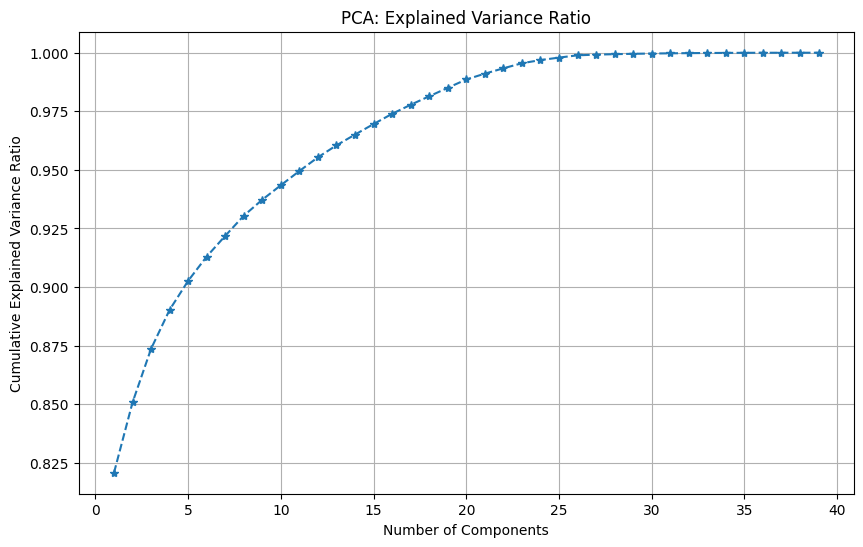

In [ ]:
from sklearn.decomposition import PCA

# # Assuming 'X' contains your features
# pca = PCA(n_components= 23)
# pca.fit(X_train)

#Assuming 'X' contains your features
pca = PCA()
pca.fit(X_trainResampled)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='*', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
#apply the optimal n_components to a new pca.
#optimal number would be something where the graph levels off.
#in our case we might wanna keep it to 95% explained variance because at the point of 20 components, it's giving unnatural results.

#components = 11
components = 25

pca = PCA(n_components= components)

X_train_pca = pca.fit_transform(X_trainResampled)   #resampled and pca both done.
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca

array([[-1.04319634e+01, -2.29022106e-01, -1.22850038e+00, ...,
        -1.25159763e-02,  6.72624096e-02,  2.87171434e-04],
       [ 2.15502846e+01, -5.86729533e-01, -2.94028862e+00, ...,
        -1.28807475e-02,  9.44529367e-02,  5.65013614e-02],
       [ 2.15048257e+01, -5.77435104e-01, -3.01727654e+00, ...,
        -1.25677341e-02,  1.64574047e-01,  1.08400098e-01],
       ...,
       [-2.20607326e+00,  1.72829504e+00,  1.89328535e+00, ...,
         1.62933762e-01,  5.34116034e-01,  9.95208102e-02],
       [-2.21425503e+00,  1.69849933e+00,  2.58464822e+00, ...,
        -6.52173843e-02,  1.06813392e-01,  1.07469425e-01],
       [ 2.03840768e+01,  3.36545637e+00,  5.08401156e-01, ...,
         2.25314937e-01, -1.74580561e+00,  3.58063759e-01]])

### ***Model Training, Validation and Evaluation.***

Now, using that are robust to outliers might be preferred to ensure that the system can detect both normal and abnormal connections effectively.

The models we are going to use are:

**Logistic Regression**

**XGBoost**

**Decision Tree Classifier**

**Naive Bayes**

**Random Forest**

**K-Nearest Neighbors**

**SVM**



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score


def model_eval(model,X_train, y_train, X_test, y_test):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})\n")

    #calculate training accuracy
    trainPred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, trainPred)
    print(f"\nThe training accuracy of the model will be: {np.round(accuracy_score(y_train, trainPred), 3)*100}%\n")

    # #calculate validation accuracy
    # valPred = model.predic)
    # val_accuracy = accuracy_score(, valPred)
    # print(f"The validation accuracy of the model will be: {np.round(accuracy_score(, valPred), 3)*100}%\n")

    testPred = model.predict(X_test)

    model_name = type(model).__name__

    print(f"{model_name} testing report on unseen data")
    print(classification_report(y_test, testPred))
    print("The confusion matrix will be: \n")
    print(confusion_matrix(y_test, testPred))
    # print(f"The ROC-AUC score on the testing data will be: {np.round(roc_auc_score(y_test, testPred), 3)}\n")


    # fpr, tpr, thresholds = roc_curve(y_test, testPred)
    # plt.plot(fpr, tpr)
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')

    print(f"\nThe testing accuracy of the model on unseen data will be: {np.round(accuracy_score(y_test, testPred), 3)*100}%\n")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

# Calculate class weights for imbalance handling
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Initialize and train Logistic Regression model with class weights and L2 regularization
lrL2 = LogisticRegression(penalty='l2', C=1.0, class_weight=dict(enumerate(class_weights)), random_state=42, multi_class='multinomial')
lrL2.fit(X_train_pca, y_trainResampled)

model_eval(lrL2, X_train_pca, y_trainResampled, X_test_pca, y_test)


ROC AUC: nan (+/- nan)


The training accuracy of the model will be: 97.6%

LogisticRegression testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     78355
           1       0.97      0.95      0.96     19353
           2       0.73      0.95      0.83       850
           3       0.31      0.93      0.47       235
           4       0.02      0.92      0.04        12

    accuracy                           0.98     98805
   macro avg       0.61      0.95      0.66     98805
weighted avg       0.99      0.98      0.99     98805

The confusion matrix will be: 

[[77677   437    69   170     2]
 [   32 18333   223   305   460]
 [    0    35   806     0     9]
 [    0    15     0   218     2]
 [    0     0     0     1    11]]

The testing accuracy of the model on unseen data will be: 98.2%



In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train_pca, y_trainResampled)

model_eval(xgb_model, X_train_pca, y_trainResampled, X_test_pca, y_test)

ROC AUC: nan (+/- nan)


The training accuracy of the model will be: 100.0%

XGBClassifier testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       1.00      1.00      1.00     19353
           2       0.99      0.99      0.99       850
           3       0.97      0.92      0.95       235
           4       0.83      0.83      0.83        12

    accuracy                           1.00     98805
   macro avg       0.96      0.95      0.95     98805
weighted avg       1.00      1.00      1.00     98805

The confusion matrix will be: 

[[78345    10     0     0     0]
 [    2 19338     7     5     1]
 [    0    11   839     0     0]
 [    0    17     0   217     1]
 [    0     1     0     1    10]]

The testing accuracy of the model on unseen data will be: 99.9%



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train_pca, y_trainResampled)

model_eval(dtc, X_train_pca, y_trainResampled, X_test_pca, y_test)

ROC AUC: nan (+/- nan)


The training accuracy of the model will be: 100.0%

DecisionTreeClassifier testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       0.99      1.00      1.00     19353
           2       0.98      0.97      0.98       850
           3       0.97      0.85      0.90       235
           4       0.47      0.58      0.52        12

    accuracy                           1.00     98805
   macro avg       0.88      0.88      0.88     98805
weighted avg       1.00      1.00      1.00     98805

The confusion matrix will be: 

[[78284    69     2     0     0]
 [    8 19321    12     5     7]
 [    3    20   826     0     1]
 [    0    35     1   199     0]
 [    0     3     0     2     7]]

The testing accuracy of the model on unseen data will be: 99.8%



In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train_pca, y_trainResampled)

model_eval(BNB_Classifier, X_train_pca, y_trainResampled, X_test_pca, y_test)

ROC AUC: nan (+/- nan)


The training accuracy of the model will be: 88.1%

BernoulliNB testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     78355
           1       0.61      0.93      0.74     19353
           2       0.38      0.81      0.51       850
           3       0.29      0.65      0.40       235
           4       0.70      0.58      0.64        12

    accuracy                           0.87     98805
   macro avg       0.59      0.76      0.64     98805
weighted avg       0.91      0.87      0.88     98805

The confusion matrix will be: 

[[66608 11506   240     1     0]
 [  116 18047   889   298     3]
 [    0    92   686    72     0]
 [    7    75     1   152     0]
 [    0     5     0     0     7]]

The testing accuracy of the model on unseen data will be: 86.5%



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfcFinal = RandomForestClassifier(n_jobs= -1, n_estimators= 35, criterion= "entropy")
rfcFinal.fit(X_train_pca, y_trainResampled)

model_eval(rfcFinal, X_train_pca, y_trainResampled, X_test_pca, y_test)

ROC AUC: nan (+/- nan)


The training accuracy of the model will be: 100.0%

RandomForestClassifier testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       1.00      1.00      1.00     19353
           2       1.00      0.98      0.99       850
           3       0.99      0.89      0.93       235
           4       0.82      0.75      0.78        12

    accuracy                           1.00     98805
   macro avg       0.96      0.92      0.94     98805
weighted avg       1.00      1.00      1.00     98805

The confusion matrix will be: 

[[78345    10     0     0     0]
 [    0 19347     3     2     1]
 [    2    15   833     0     0]
 [    0    26     0   208     1]
 [    0     3     0     0     9]]

The testing accuracy of the model on unseen data will be: 99.9%



In [ ]:
from sklearn.svm import LinearSVC

newSVM = LinearSVC()
newSVM.fit(X_train_pca, y_trainResampled)

model_eval(newSVM, X_train_pca, y_trainResampled, X_test_pca, y_test)

ROC AUC: nan (+/- nan)


The training accuracy of the model will be: 99.2%

LinearSVC testing report on unseen data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78355
           1       0.98      0.99      0.99     19353
           2       0.81      0.81      0.81       850
           3       0.49      0.09      0.16       235
           4       0.00      0.00      0.00        12

    accuracy                           0.99     98805
   macro avg       0.66      0.58      0.59     98805
weighted avg       0.99      0.99      0.99     98805

The confusion matrix will be: 

[[78316    39     0     0     0]
 [   93 19150    96    13     1]
 [    8   141   691    10     0]
 [    2   147    63    22     1]
 [    3     9     0     0     0]]

The testing accuracy of the model on unseen data will be: 99.4%



*Approach 1: Applying a combination of **SMOTE** and RandomOverSampler. This method is more useful for the 5 class distribution.*